In [45]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
     |████████████████████████████████| 8.6 MB 3.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ktrain 0.31.3 requires scikit-learn==0.24.2, but you have scikit-learn 1.1.2 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('Libraries Imported Successfully')

Libraries Imported Successfully


In [2]:
df = pd.read_csv('Stroke Data/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
## Majority of the data is coming from non-stroke users

df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='age'>

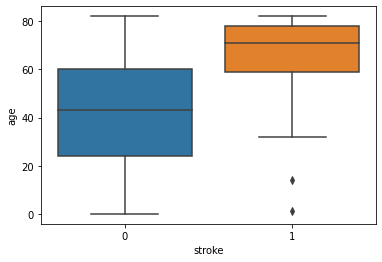

In [5]:
sns.boxplot(y = 'age', x = 'stroke', data = df)

## Clearly on average, people who have strokes are of higher age than not.

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

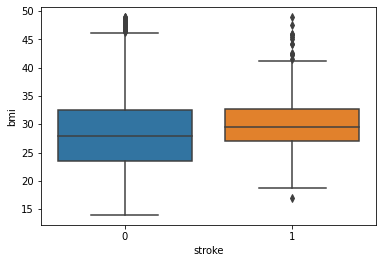

In [6]:
sns.boxplot(y = 'bmi', x = 'stroke', data = df)

## No clear delineation between bmi and stroke

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

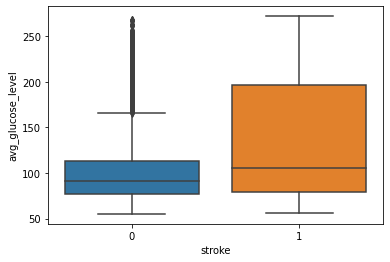

In [7]:
sns.boxplot(y = 'avg_glucose_level', x = 'stroke', data = df)

## It seems that those who have strokes can have a wide area of glucose levels
## While there is overlap in the two different distributions, the distribution for people who have had strokes is much larger

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

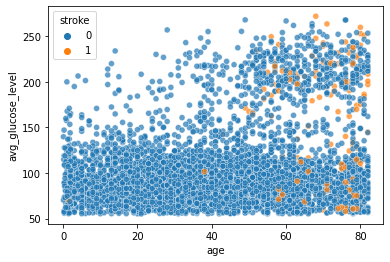

In [8]:
sns.scatterplot(x = 'age', y = 'avg_glucose_level', hue = 'stroke', data = df, alpha=.7)

## While we do see older age people with lower glucose levels having strokes, it seems that older people with higher glucose levels seem more at risk of strokes. 

<AxesSubplot:xlabel='hypertension', ylabel='avg_glucose_level'>

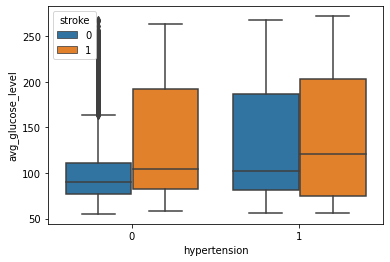

In [9]:
sns.boxplot(y = 'avg_glucose_level', x = 'hypertension', hue = 'stroke', data = df)

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

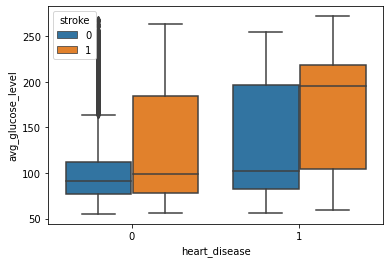

In [10]:
sns.boxplot(y = 'avg_glucose_level', x = 'heart_disease', hue = 'stroke', data = df)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

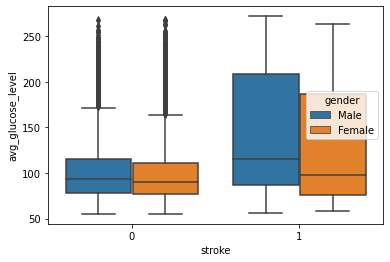

In [11]:
sns.boxplot(y = 'avg_glucose_level', x = 'stroke', hue = 'gender', data = df)

## Looks like Females who have strokes only need a slightly smaller glucose level to be at risk

In [73]:
## One Hot Encode all Data

strCols = df.columns[df.dtypes == 'object']
numCols = df.columns[df.dtypes != 'object']

dfOneHot = pd.get_dummies(df[strCols], drop_first=True)
dfNum = df[numCols]
dfTot = pd.concat([dfOneHot, dfNum], axis = 1)

np.abs(dfTot.corr()['stroke']).sort_values(ascending=False)

stroke                            1.000000
age                               0.246478
heart_disease                     0.134610
avg_glucose_level                 0.133227
hypertension                      0.131965
ever_married_Yes                  0.108398
work_type_children                0.085075
smoking_status_formerly smoked    0.065320
work_type_Self-employed           0.062643
bmi                               0.056926
Residence_type_Urban              0.016494
work_type_Private                 0.010459
gender_Male                       0.008870
smoking_status_smokes             0.008561
smoking_status_never smoked       0.004806
Name: stroke, dtype: float64

In [78]:
## Oversample the lower dataset
print(dfTot[dfTot['stroke'] == 1].shape)
print(dfTot[dfTot['stroke'] == 0].shape)

dfStr = dfTot[dfTot['stroke'] == 0].sample(4733, replace=True, random_state=101)
dfNonStr = dfTot[dfTot['stroke'] == 1].sample(4733, replace=True, random_state=101)

print(dfStr.shape)
print(dfNonStr.shape)

dfTotNew = pd.concat([dfStr, dfNonStr], axis = 0)
dfTotNew.shape

print(dfTot.columns)
print(list(numCols))

(248, 15)
(4733, 15)
(4733, 15)
(4733, 15)
Index(['gender_Male', 'ever_married_Yes', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [68]:
# X = df.drop('stroke', axis = 1)
# y = df['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=101)

# scaler = StandardScaler()
# col_names = list(df.columns[df.dtypes != 'object'])
# col_names.remove('stroke')

# features_train = X_train[col_names]
# features_train_scaled = scaler.fit_transform(features_train)
# X_train[col_names] = features_train_scaled

# features_test = X_test[col_names]
# features_test_scaled = scaler.transform(features_test)
# X_test[col_names] = features_test_scaled

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [82]:
from random import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def split(df, scale = True):
    X = df.drop('stroke', axis = 1)
    y = df['stroke']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=101)

    if scale == True:
        scaler = StandardScaler()
        col_names = list(numCols)
        col_names.remove('stroke')

        features_train = X_train[col_names]
        features_train_scaled = scaler.fit_transform(features_train)
        X_train[col_names] = features_train_scaled

        features_test = X_test[col_names]
        features_test_scaled = scaler.transform(features_test)
        X_test[col_names] = features_test_scaled

    return X_train, X_test, y_train, y_test

X_train_other, X_test_other, y_train_other, y_test_other = split(dfTot)
X_train, X_test, y_train, y_test = split(dfTotNew)

print(X_train.shape)

(8519, 14)


In [86]:
## Model Function

def ModelCV(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, param_grid = {}, model = ''):
    ## Imports Needed
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
    gridModel = GridSearchCV(model, param_grid=param_grid, cv=10)

    gridModel.fit(X_train, y_train)
    yhat = gridModel.predict(X_test)

    print('------------------------ Grid Search CV Best Params ------------------------')
    print(gridModel.best_params_)
    print('------------------------ Classification Report ------------------------')
    print(classification_report(y_test, yhat))
    print('------------------------ Confusion Matrix ------------------------')
    plot_confusion_matrix(gridModel, X_test, y_test)

    return gridModel

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_reg_strength * weights
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaco

------------------------ Grid Search CV Best Params ------------------------
{'C': 1.3333333333333333, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       475
           1       0.75      0.80      0.78       472

    accuracy                           0.77       947
   macro avg       0.77      0.77      0.77       947
weighted avg       0.77      0.77      0.77       947

------------------------ Confusion Matrix ------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


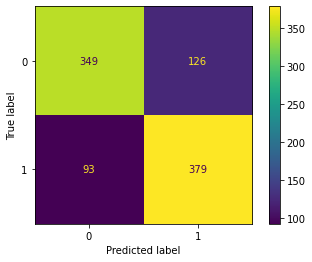

In [87]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],
    'C': np.linspace(0,12,10),
    'class_weight': ['balanced'],
    'solver': ['newton-cg'],
}

model = ModelCV(X_train, X_test, y_train, y_test, param_grid=param_grid, model = LogisticRegression())

In [88]:
# from sklearn.neighbors import KNeighborsClassifier

# param_grid = {
#     'n_neighbors': list(range(1,21)),
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': np.round(np.linspace(1,50,20), 0),
# }

# knn_model = ModelCV(X_train_other, X_test_other, y_train_other, y_test_other, param_grid=param_grid, model = KNeighborsClassifier())

------------------------ Grid Search CV Best Params ------------------------
{'algorithm': 'auto', 'n_neighbors': 10}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       463
           1       0.00      0.00      0.00        36

    accuracy                           0.93       499
   macro avg       0.46      0.50      0.48       499
weighted avg       0.86      0.93      0.89       499

------------------------ Confusion Matrix ------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/util

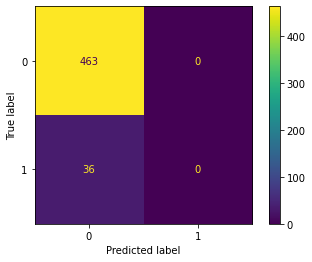

In [84]:
## K-Nearest Neighbors will effectively always have a neighbor with the correct categorization
## Not an effective algorithm due to this

param_grid = {'algorithm': ['auto'], 'n_neighbors': [1,5,10]}
knn_model = ModelCV(X_train_other, X_test_other, y_train_other, y_test_other, param_grid=param_grid, model = KNeighborsClassifier())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
960 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-package

------------------------ Grid Search CV Best Params ------------------------
{'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 100}
------------------------ Classification Report ------------------------
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       475
           1       0.79      0.88      0.83       472

    accuracy                           0.82       947
   macro avg       0.82      0.82      0.82       947
weighted avg       0.83      0.82      0.82       947

------------------------ Confusion Matrix ------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


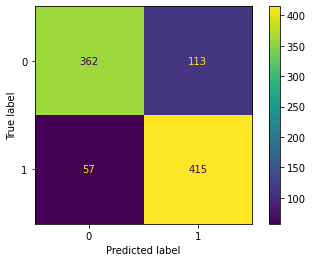

In [89]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50,100,150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6],
    'min_samples_split': [1,2,3,4,5],
    'max_features': [2,3,4, 'sqrt']
}

randFor_model = ModelCV(param_grid=param_grid, model = RandomForestClassifier())

In [90]:
## Support Vector Classifier
from sklearn.svm import SVC 

param_grid = {
    'C': np.linspace(0,20,5),
    'degree': [2,3,4,5],
    'kernel': ['poly', 'rbf', 'sigmoid'],
}

svm_model = ModelCV(param_grid = param_grid, model = SVC())

KeyboardInterrupt: 